In [1]:
import sysconfig
import os
import numpy as np
import pandas as pd
import json
import distutils
import scrapy
import requests
import json
import logging
import string
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [2]:
# Read the data file and display
train = pd.read_json('stayz.json')
train

,bathrooms,bedrooms,beds,description_full,guests,heading,house_specs,init_price,lat,lng,property_id,property_type,rating,reviews,url
0,1,3,3,My two story earthy Appalachian waterfront log...,6,Charming 3 Bedroom Waterfront Log Cabin w/ Jet...,"[\n 6 guests, \n 3 bedrooms, \n ...",413,-35.389233,150.44514,4818421,House,({{averageRating | number:1}}),0,https://www.stayz.com.au//accommodation/nsw/so...
1,1,1,1,This brand new luxury studio apartment has bee...,3,Brand New Luxury Studio in Heart of Maroubra,"[\n 3 guests, \n 1 bedroom, \n ...",0,-33.935814,151.23167,4814271,House,({{averageRating | number:1}}),0,https://www.stayz.com.au//accommodation/nsw/sy...
2,2,4,8,MID-WEEK SPECIAL-Stay 3 nights from Sunday to ...,8,"Desiderata - luxury, breathtaking views, child...","[\n 8 guests, \n 4 bedrooms, \n ...",0,-34.744484,150.57399,9152089,House,({{averageRating | number:1}}),0,https://www.stayz.com.au//accommodation/nsw/so...
3,1,2,2,This small apartment has two double bunk bed a...,5,Chick apartment in the centre of maroubra junc...,"[\n 5 guests, \n 2 bedrooms, \n ...",0,-33.940100,151.23688,4813456,Apartment,({{averageRating | number:1}}),0,https://www.stayz.com.au//accommodation/nsw/sy...
4,2,3,3,This gorgeous beach house located in the heart...,6,Palmiers Byron Bay - luxe accomodation in cent...,"[\n 6 guests, \n 3 bedrooms, \n ...",437,-28.656143,153.61705,4814108,House,({{averageRating | number:1}}),0,https://www.stayz.com.au//accommodation/nsw/no...
5,3,3,4,With private views across Blackheath golf cour...,6,Heathmist - modern luxury in Blackheath,"[\n 6 guests, \n 3 bedrooms, \n ...",0,-33.648450,150.29137,4815904,House,({{averageRating | number:1}}),0,https://www.stayz.com.au//accommodation/nsw/bl...
6,5,6,7,"Manor House, Moss Vale is an historic gothic r...",12,"Manor House, Moss Vale. Luxurious private hist...","[\n 12 guests, \n 6 bedrooms, \n...",0,-34.551018,150.36508,4811192,Resort,({{averageRating | number:1}}),0,https://www.stayz.com.au//accommodation/nsw/so...
7,1,3,4,"Katoomba Central Location, Walk to echo Point/...",9,"EcoAngelus, Situated In the heart of Katoomba","[\n 9 guests, \n 3 bedrooms, \n ...",0,-33.722200,150.31068,4818086,House,({{averageRating | number:1}}),0,https://www.stayz.com.au//accommodation/nsw/bl...
8,1,3,3,JUST LISTED The lovely old cottage has been fu...,6,Stylish in a quiet street and close to the CBD,"[\n 6 guests, \n 3 bedrooms, \n ...",0,-33.287407,149.08711,4814987,House,({{averageRating | number:1}}),0,https://www.stayz.com.au//accommodation/nsw/ex...
9,2,2,3,Fin's at Sapphire is absolute beachfront with ...,4,Fin's at Sapphire Beach 'Dolphin' apartment - ...,"[\n 4 guests, \n 2 bedrooms, \n ...",372,-30.241495,153.14793,4820496,Apartment,({{averageRating | number:1}}),0,https://www.stayz.com.au//accommodation/nsw/no...


In [3]:
#http://hamelg.blogspot.com.au/2015/11/python-for-data-analysis-part-29.html

train.describe()


,bathrooms,bedrooms,beds,guests,init_price,lat,lng,property_id,reviews
count,18193.000000,18193.000000,18193.000000,18193.000000,18193.000000,18193.000000,18193.000000,1.819300e+04,18193.000000
mean,1.843291,2.971582,4.323751,6.665806,291.112791,-33.184256,151.281443,3.928598e+05,5.682185
std,1.131042,1.535821,3.143143,3.737307,312.483545,2.525884,4.567920,1.394336e+06,12.349139
min,0.000000,0.000000,0.000000,1.000000,0.000000,-41.449306,-100.945830,8.000000e+00,0.000000
25%,1.000000,2.000000,3.000000,4.000000,137.000000,-34.778866,150.553800,1.103390e+05,0.000000
50%,2.000000,3.000000,4.000000,6.000000,204.000000,-33.616173,151.270000,1.757650e+05,1.000000
75%,2.000000,4.000000,5.000000,8.000000,326.000000,-32.344360,152.382860,2.095790e+05,5.000000
max,41.000000,41.000000,110.000000,120.000000,7293.000000,41.970135,167.949000,9.228516e+06,192.000000


Text(0,0.5,'Count')

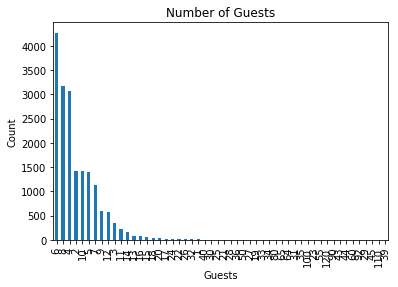

In [4]:
train['guests'].value_counts().plot(kind='bar')
plt.title('Number of Guests')
plt.xlabel('Guests')
plt.ylabel('Count')

Type
Apartment    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
B&B          [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Cabin        [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Campervan    [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Caravan      [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Chalet       [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Cottage      [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Farmstay     [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Guest        [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Hotel        [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
House        [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Lodge        [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Motel        [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Other        [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Resort       [[AxesSubplot(0.125,0.551739;0.336957x0.328261...
Studio       [[AxesSubplot(0.125,0.551739;0.336957

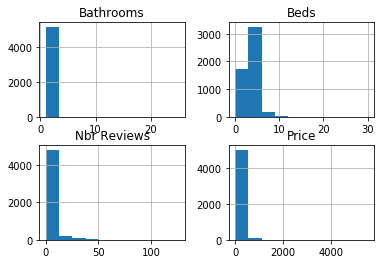

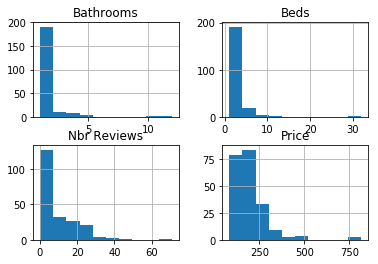

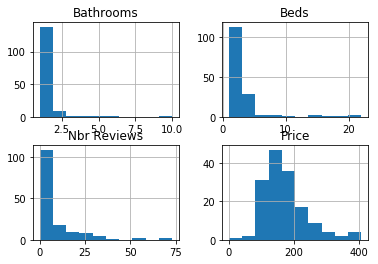

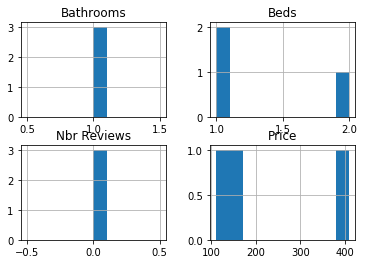

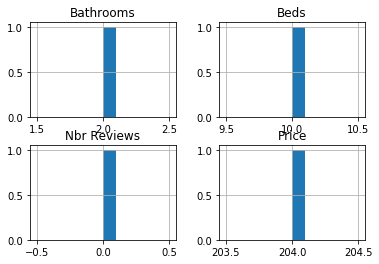

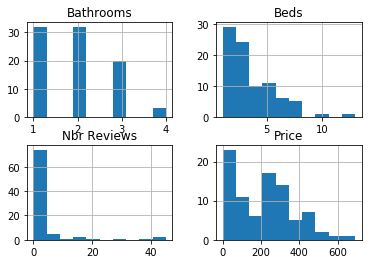

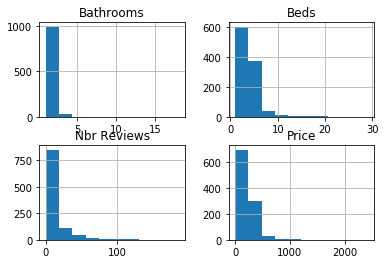

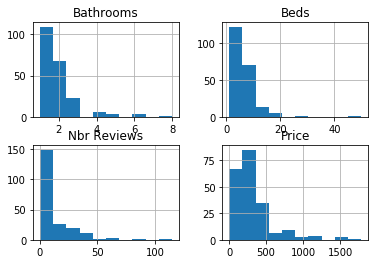

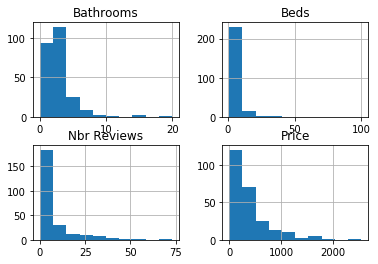

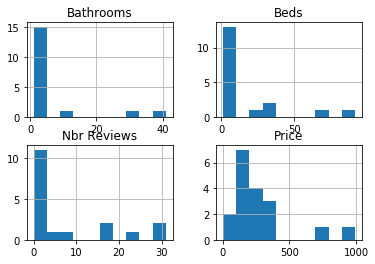

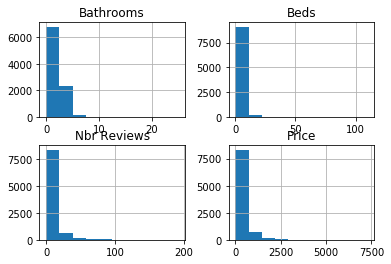

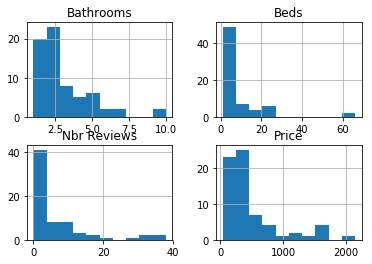

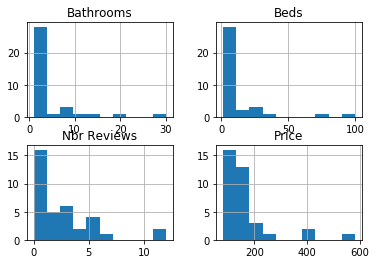

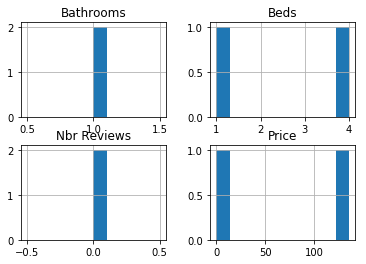

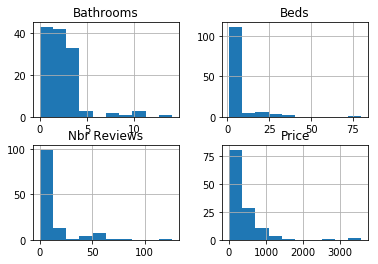

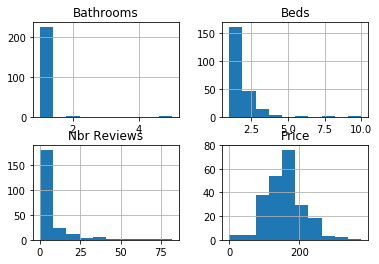

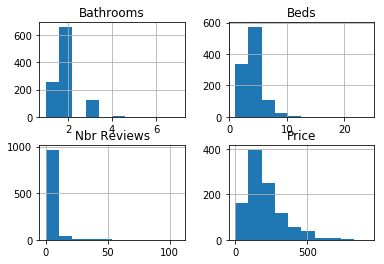

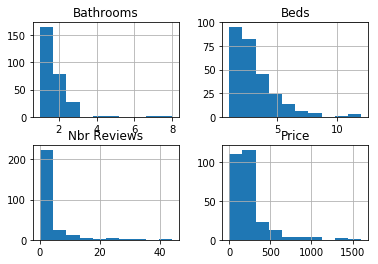

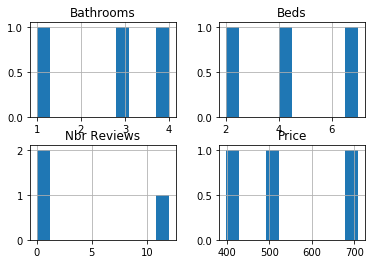

In [5]:
train_display = pd.DataFrame({
    'Nbr Reviews': train['reviews'],
    'Price': train['init_price'],
    'Type': train['property_type'],
    'Bathrooms' : train['bathrooms'],
    'Beds' : train['beds']
})


train_display.groupby('Type').hist()

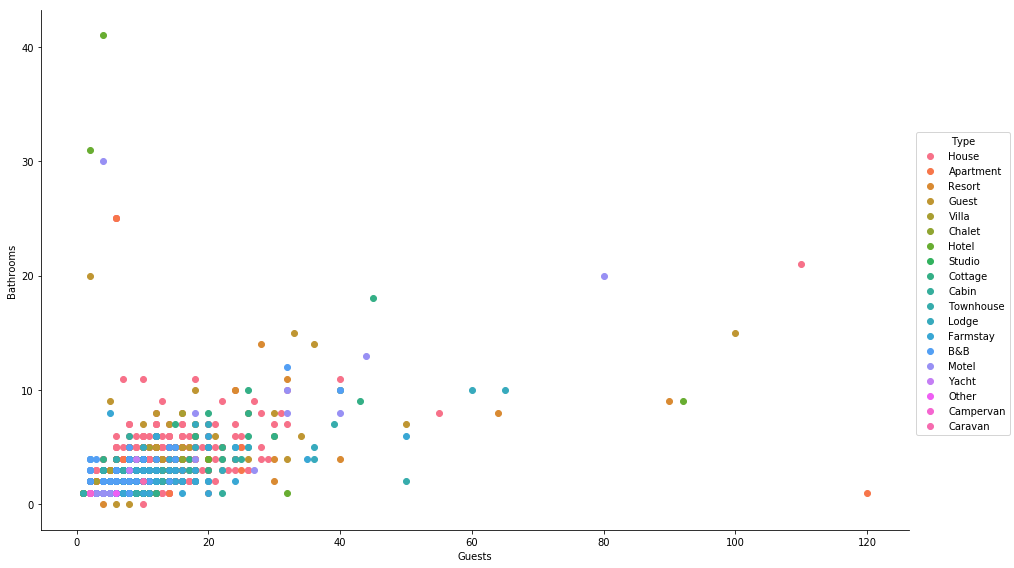

In [6]:
df = pd.DataFrame({
    'Guests': train['guests'],
    'Bathrooms': train['bathrooms'],
    'Type': train['property_type']
})

fg = sns.FacetGrid(data=df, hue='Type', aspect=1.61, size=8)
fg.map(plt.scatter, 'Guests', 'Bathrooms').add_legend()

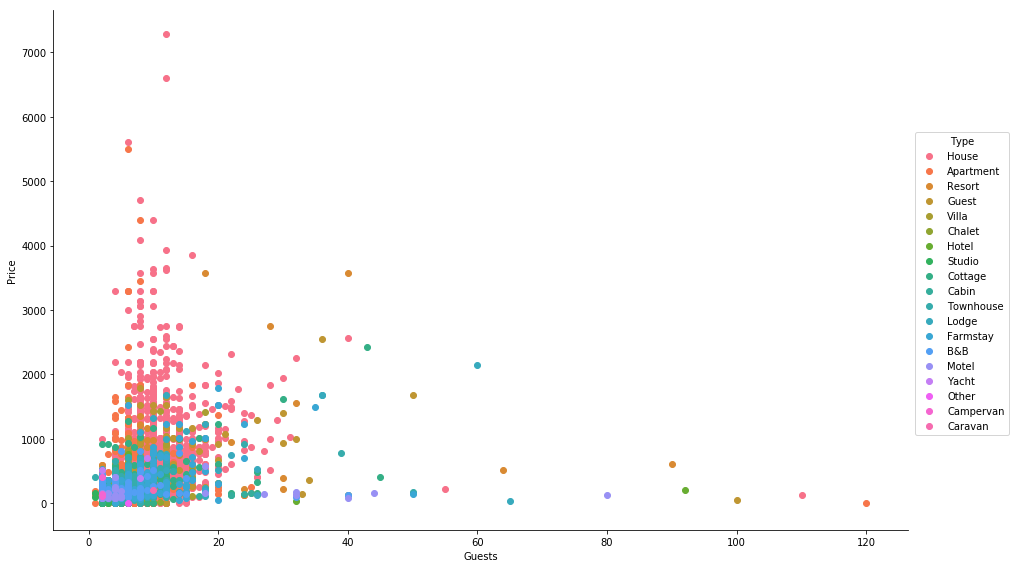

In [7]:
df = pd.DataFrame({
    'Guests': train['guests'],
    'Price': train['init_price'],
    'Type': train['property_type']
})

fg = sns.FacetGrid(data=df, hue='Type', aspect=1.61, size=8)
fg.map(plt.scatter, 'Guests', 'Price').add_legend()

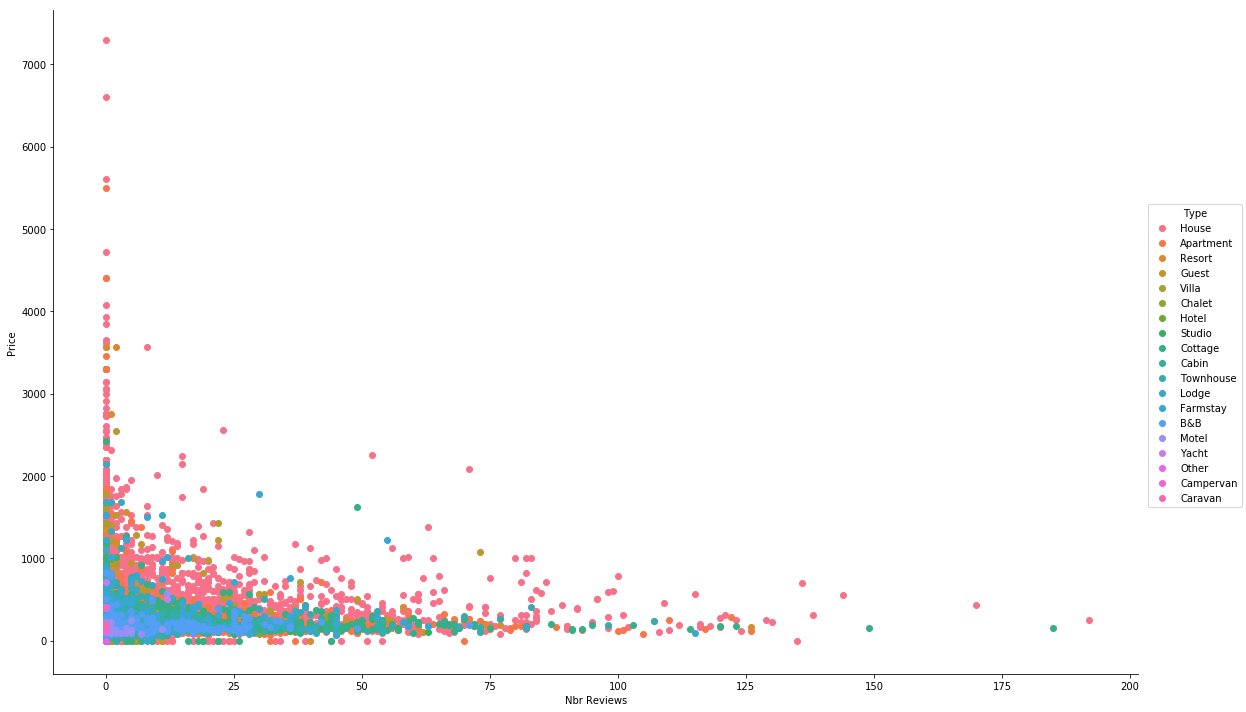

In [8]:
df = pd.DataFrame({
    'Nbr Reviews': train['reviews'],
    'Price': train['init_price'],
    'Type': train['property_type'],    
})

fg = sns.FacetGrid( data=df, hue='Type', aspect=1.61, size=10)
fg.map(plt.scatter, 'Nbr Reviews', 'Price').add_legend()

In [9]:
#X = train.drop(['init_price'],axis=1)
#X = X.drop(['lat'],axis=1)
#X = X.drop([''],axis=1)

X = pd.DataFrame({
    'Nbr Reviews': train['reviews'],
    'Price': train['init_price'],
    #'Type': train['property_type'],
    'Bathrooms' : train['bathrooms'],
    'Beds' : train['beds'],
    'Guests' : train['guests'],
    'Lat' : train['lat'],
    'Lon' : train['lng']
})
Y = train['init_price']

In [10]:
X.describe()

,Bathrooms,Beds,Guests,Lat,Lon,Nbr Reviews,Price
count,18193.000000,18193.000000,18193.000000,18193.000000,18193.000000,18193.000000,18193.000000
mean,1.843291,4.323751,6.665806,-33.184256,151.281443,5.682185,291.112791
std,1.131042,3.143143,3.737307,2.525884,4.567920,12.349139,312.483545
min,0.000000,0.000000,1.000000,-41.449306,-100.945830,0.000000,0.000000
25%,1.000000,3.000000,4.000000,-34.778866,150.553800,0.000000,137.000000
50%,2.000000,4.000000,6.000000,-33.616173,151.270000,1.000000,204.000000
75%,2.000000,5.000000,8.000000,-32.344360,152.382860,5.000000,326.000000
max,41.000000,110.000000,120.000000,41.970135,167.949000,192.000000,7293.000000


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18193 entries, 0 to 18192
Data columns (total 7 columns):
Bathrooms      18193 non-null int64
Beds           18193 non-null int64
Guests         18193 non-null int64
Lat            18193 non-null float64
Lon            18193 non-null float64
Nbr Reviews    18193 non-null int64
Price          18193 non-null int64
dtypes: float64(2), int64(5)
memory usage: 1.7 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a14639400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a14acb6a0>]], dtype=object)

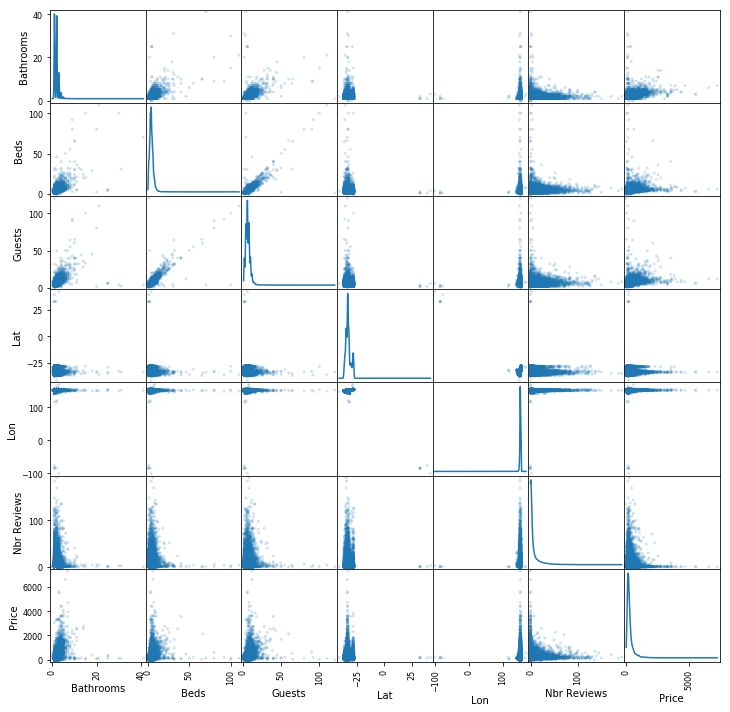

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix(X, alpha=0.2, figsize=(12, 12), diagonal='kde')

In [13]:
model = DecisionTreeClassifier()
model.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:

print(cross_val_score(model,X,Y,cv=10,scoring='accuracy').mean())

/Users/taj/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.979562045075
